In [1]:
from tqdm import tqdm
import sys
import datetime

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
#set project directory
project_dir = "/Users/vigadam/Dropbox/My Mac (MacBook-Air.local)/Documents/github/renfe-research/"

## Figures

In [4]:
data = pd.read_pickle(project_dir + "data/data_work.pkl")

In [5]:
data["route_main"] = data["route"].str.replace("MADRID","")

In [4]:
data["mean_econ_price"]=data["mean_econ_price"].round()

In [47]:
# no sales experienced per day and train
(data["econ_seats_sold"].value_counts()[0] / data.shape[0]).round(3)

0.286

In [54]:
# no price change for trains per days observed.
(data["price_change"].round().value_counts()[0] / data.shape[0]).round(3)

0.849

In [57]:
# no price change during the observed booking horizon
round(
    (
        data.groupby(["route_main", "train_id"])
        .agg(unique_fares=("mean_econ_price", "nunique"))
        .query("unique_fares == 1")
        .shape[0]
        / data["train_id"].nunique()
    ),
    3,
)

0.126

In [183]:
data[["mean_econ_price", "loading_factor", "price_change", "econ_seats_sold"]].describe(
    percentiles=[0.05, 0.5, 0.95]
).assign(
    unique_fares=data.groupby(["route_main", "train_id"])
    .agg(unique_fares=("mean_econ_price", "nunique"))
    .describe(percentiles=[0.05, 0.5, 0.95])
).round(
    2
).T.reset_index().rename(
    columns={"50%": "median", "index": "Variable"}
)[
    ["Variable", "mean", "std", "median", "5%", "95%"]
]#.to_excel("descriptive_raw.xlsx")

,Variable,mean,std,median,5%,95%
0,mean_econ_price,62.91,19.84,58.00,37.00,96.00
1,loading_factor,0.39,0.16,0.37,0.15,0.68
2,price_change,0.26,2.60,0.00,-0.01,4.29
3,econ_seats_sold,5.10,8.86,2.00,0.00,20.00
4,unique_fares,4.19,2.11,4.00,1.00,8.00


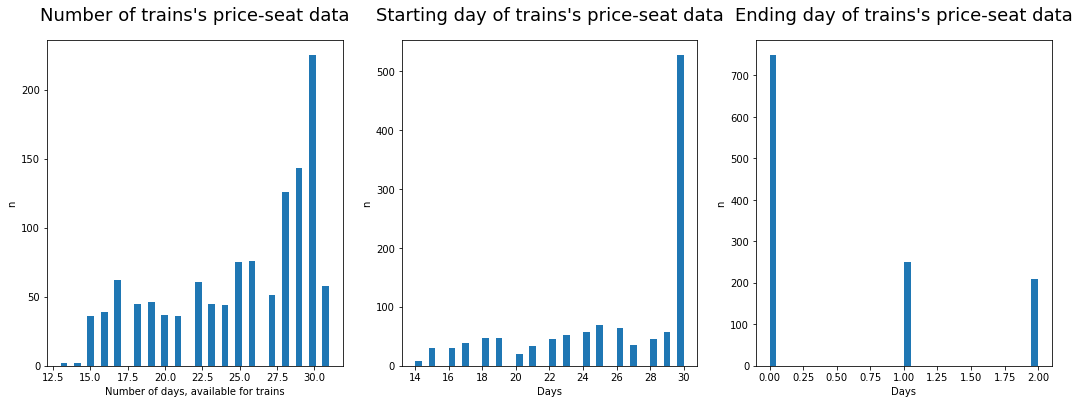

In [8]:
figdata = data.sort_values(by=["train_id", "days_till_dep"]).groupby("train_id")[
    "days_till_dep"
]

plt.figure(figsize=(18, 6))

ax1 = plt.subplot(1, 3, 1)
#ax1.set_xlim(13, 35)
# ax1.set_ylim(0,50)
ax1.hist(figdata.count(), bins=40)
plt.xlabel("Number of days, available for trains", fontsize=10, fontweight=450)
plt.ylabel("n", fontsize=10, fontweight=450)

plt.title("Number of trains's price-seat data", fontsize=18, y=1.04)


ax2 = plt.subplot(1, 3, 2)
# ax2.set_xlim(35, 110)
# ax2.set_ylim(0, 0.14)
ax2.hist(figdata.last(), bins=40)
plt.xlabel("Days", fontsize=10, fontweight=450)
plt.ylabel("n", fontsize=10, fontweight=450)

plt.title(
    "Starting day of trains's price-seat data", fontsize=18, y=1.04
)


ax3 = plt.subplot(1, 3, 3)
# ax3.set_xlim(35, 110)
# ax3.set_ylim(0, 0.14)
ax3.hist(figdata.first(), bins=40)
plt.xlabel("Days", fontsize=10, fontweight=450)
plt.ylabel("n", fontsize=10, fontweight=450)

plt.title(
    "Ending day of trains's price-seat data", fontsize=18, y=1.04
)

plt.show()

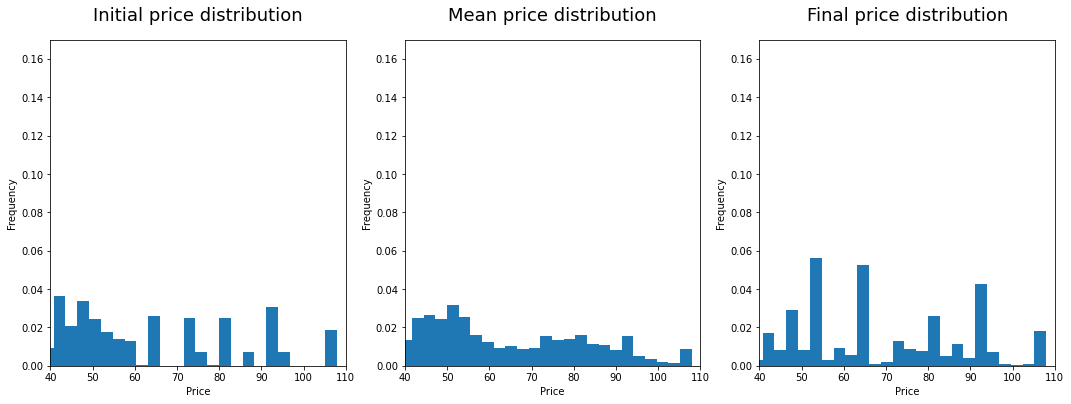

In [9]:
figdata = data.sort_values(by=["train_id", "days_till_dep"]).groupby("train_id")[
    "mean_econ_price"
]

plt.figure(figsize=(18, 6))

xlim_min = 40
xlim_max = 110
ylim_min = 0
ylim_max = 0.17

ax1 = plt.subplot(1, 3, 1)
ax1.set_xlim(xlim_min, xlim_max)
ax1.set_ylim(ylim_min, ylim_max)
ax1.hist(figdata.last(), bins=30, density=True)
plt.xlabel("Price", fontsize=10, fontweight=450)
plt.ylabel("Frequency", fontsize=10, fontweight=450)

plt.title("Initial price distribution", fontsize=18, y=1.04)


ax2 = plt.subplot(1, 3, 2)
ax2.set_xlim(xlim_min, xlim_max)
ax2.set_ylim(ylim_min, ylim_max)
ax2.hist(figdata.mean(), bins=30, density=True)
plt.xlabel("Price", fontsize=10, fontweight=450)
plt.ylabel("Frequency", fontsize=10, fontweight=450)

plt.title("Mean price distribution", fontsize=18, y=1.04)


ax3 = plt.subplot(1, 3, 3)
ax3.set_xlim(xlim_min, xlim_max)
ax3.set_ylim(ylim_min, ylim_max)
ax3.hist(figdata.first(), bins=30, density=True)
plt.xlabel("Price", fontsize=10, fontweight=450)
plt.ylabel("Frequency", fontsize=10, fontweight=450)

plt.title("Final price distribution", fontsize=18, y=1.04)

plt.show()

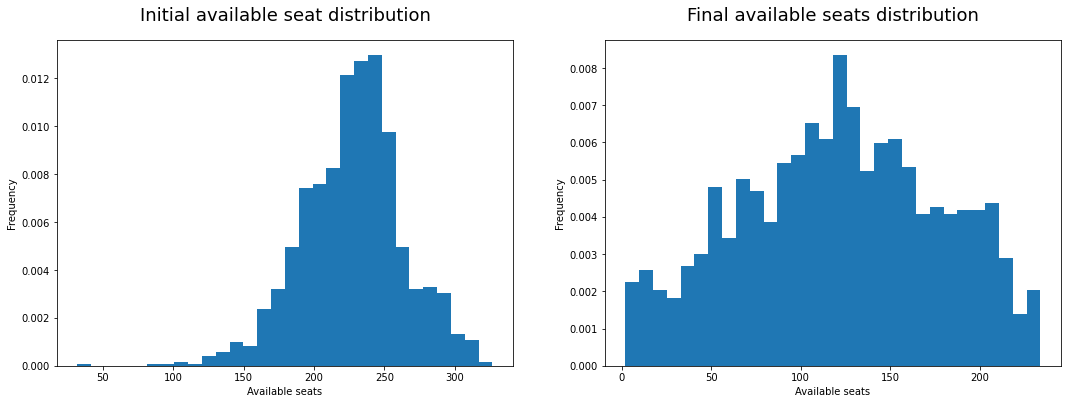

In [10]:
figdata = data.sort_values(by=["train_id", "days_till_dep"]).groupby("train_id")[
    "mean_econ_seats"
]

plt.figure(figsize=(18, 6))

ax1 = plt.subplot(1, 2, 1)
#ax1.set_xlim(35, 110)
#ax1.set_ylim(0, 0.14)
ax1.hist(figdata.last(), bins=30, density=True)
plt.xlabel("Available seats", fontsize=10, fontweight=450)
plt.ylabel("Frequency", fontsize=10, fontweight=450)

plt.title("Initial available seat distribution", fontsize=18, y=1.04)


ax2 = plt.subplot(1, 2, 2)
#ax3.set_xlim(35, 110)
#ax3.set_ylim(0, 0.14)
ax3.hist(figdata.first(), bins=30, density=True)
plt.xlabel("Available seats", fontsize=10, fontweight=450)
plt.ylabel("Frequency", fontsize=10, fontweight=450)

plt.title("Final available seats distribution", fontsize=18, y=1.04)

plt.show()

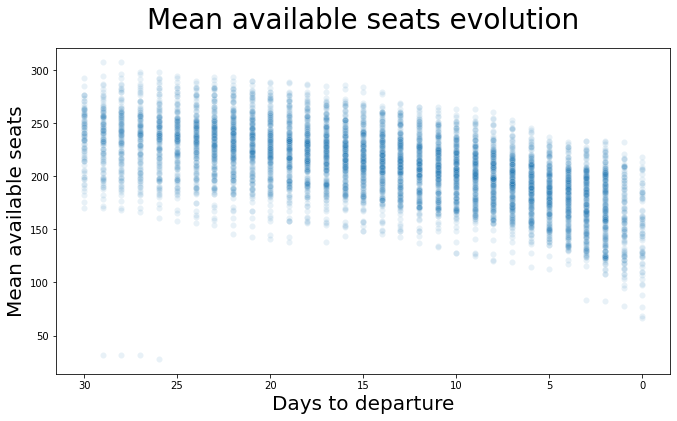

In [151]:
plt.figure(figsize=(11, 6))

sns.scatterplot(
    data=data.loc[data["route_main"] == "CORDOBA"],
    x="days_till_dep",
    y="mean_econ_seats",
    alpha=0.1
    #hue="train_id",
)#.get_legend().remove()


plt.gca().invert_xaxis()

plt.xlabel("Days to departure", fontsize=20, fontweight=450)
plt.ylabel("Mean available seats", fontsize=20, fontweight=450)

plt.title("Mean available seats evolution", fontsize=28, y=1.04)

plt.show()

<AxesSubplot:>

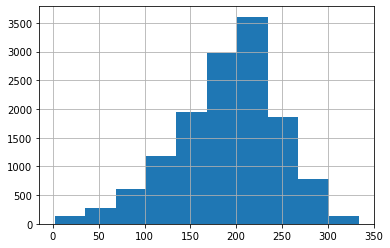

In [150]:
data.query("route_main == 'BARCELONA'")["max_econ_seats"].hist()

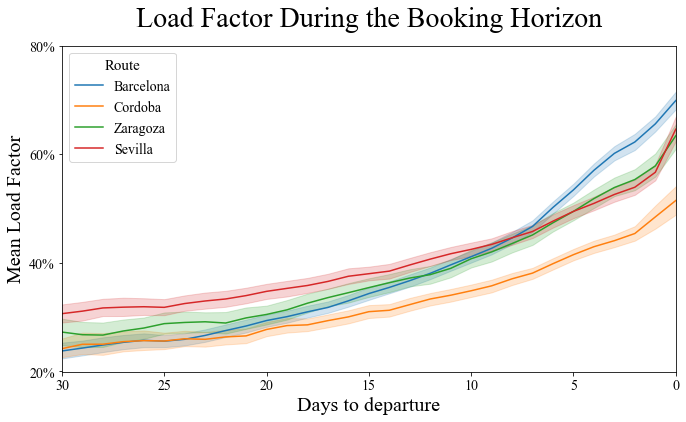

In [231]:
fig, ax = plt.subplots(figsize=(11, 6))

sns.lineplot(
    data=data, x="days_till_dep", y="loading_factor", estimator="mean", hue="route_main"
)

plt.xlim(30, 0)

plt.xlabel("Days until departure", fontsize=20, fontweight=450)
plt.ylabel("Mean Load Factor", fontsize=20, fontweight=450)

plt.title("Load Factor During the Booking Horizon", fontsize=28, y=1.04)
plt.legend(
    ("Barcelona", "Cordoba", "Zaragoza", "Sevilla"), loc="upper left", prop={"size": 14}
).set_title("Route", prop={"size": 15})


ax.tick_params(axis="both", which="major", labelsize=14)

ax.set_yticks(np.arange(0.2, 1, 0.2))
plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])

plt.show()

# route categorical

In [140]:
data.query("route == 'BARCELONAMADRID' and days_till_dep == 0")["loading_factor"].mean().round(4)

0.6828

In [141]:
data.query("route == 'CORDOBAMADRID' and days_till_dep == 0")["loading_factor"].mean().round(4)

0.5003

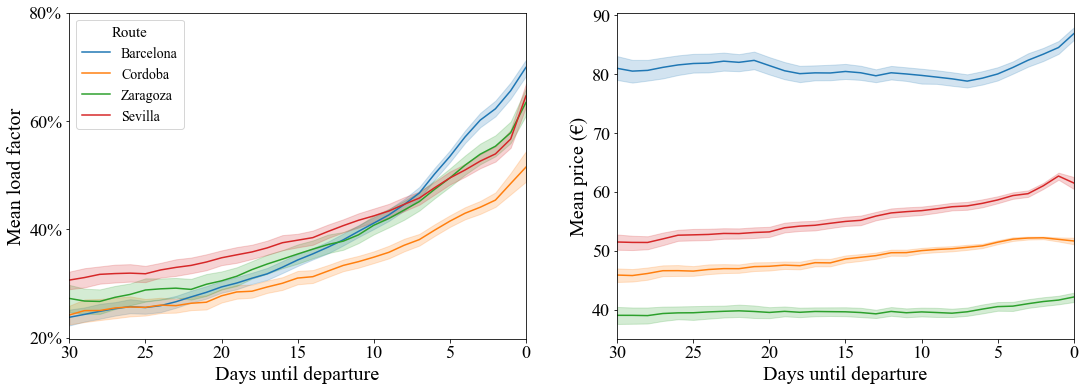

In [74]:
plt.figure(figsize=(18, 6))

ax1 = plt.subplot(1, 2, 1)
# ax1.set_xlim(35, 110)
# ax1.set_ylim(0, 0.14)
sns.lineplot(
    data=data,
    x="days_till_dep",
    y="loading_factor",
    estimator="mean",
    hue="route_main",
    ax=ax1,
)

plt.xlim(30, 0)

plt.xlabel("Days until departure", fontsize=20, fontweight=450)
plt.ylabel("Mean load factor", fontsize=20, fontweight=450)

#plt.title("Load Factor During the Booking Horizon", fontsize=28, y=1.04)
plt.legend(
    ("Barcelona", "Cordoba", "Zaragoza", "Sevilla"), loc="upper left", prop={"size": 14}
).set_title("Route", prop={"size": 15})


ax1.tick_params(axis="both", which="major", labelsize=18)

ax1.set_yticks(np.arange(0.2, 1, 0.2))
plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])

ax2 = plt.subplot(1, 2, 2)

sns.lineplot(
    data=data,
    x="days_till_dep",
    y="mean_econ_price",
    estimator="mean",
    hue="route_main",
    ax=ax2,
).get_legend().remove()


plt.gca().invert_xaxis()

plt.xlabel("Days until departure", fontsize=20, fontweight=450)
plt.ylabel("Mean price (€)", fontsize=20, fontweight=450)

plt.xlim(30, 0)
ax2.tick_params(axis="both", which="major", labelsize=18)


#plt.savefig("figures/mean_loadf_price", dpi=300)

plt.show()

In [11]:
data.groupby("peak_hour")["mean_econ_price"].mean()

peak_hour
0    60.685640
1    69.056041
Name: mean_econ_price, dtype: float64

In [14]:
data.query("days_till_dep >=25").groupby("peak_hour")["mean_econ_price"].mean().diff(-1)

peak_hour
0   -13.519293
1          NaN
Name: mean_econ_price, dtype: float64

In [17]:
data.query("days_till_dep == 30").groupby("peak_hour")["mean_econ_price"].mean()

peak_hour
0    58.548755
1    72.372963
Name: mean_econ_price, dtype: float64

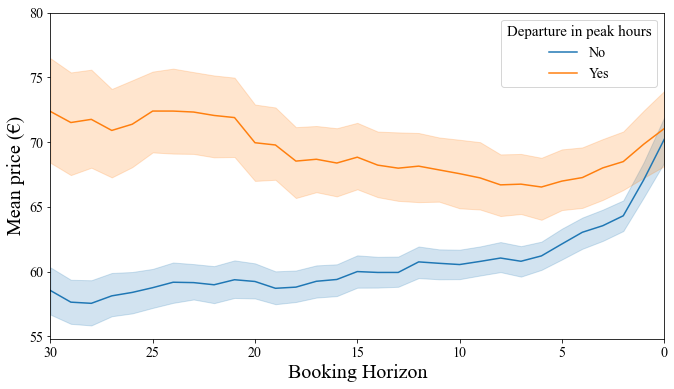

In [8]:
fig, ax = plt.subplots(figsize=(11, 6))

sns.lineplot(
    data=data,
    x="days_till_dep",
    y="mean_econ_price",
    estimator="mean",
    hue="peak_hour",
)#.get_legend().remove()


plt.gca().invert_xaxis()

plt.xlabel("Booking Horizon", fontsize=20, fontweight=450)
plt.ylabel("Mean price (€)", fontsize=20, fontweight=450)

plt.xlim(30,0)
#plt.ylim(75,90)
plt.legend(
    ("No","Yes"), loc="upper right", prop={"size": 14}
).set_title("Departure in peak hours", prop={"size": 15})

tick_max = 80
tick_interval = 5
ax.set_yticks(np.arange(55, tick_max + tick_interval, tick_interval))

#plt.title("Mean price evolution", fontsize=28, y=1.04)
plt.tick_params(axis="both", which="major", labelsize=14)

plt.savefig("figures/fig4_peak_hour", dpi=300)
plt.show()

# peak hour difference in price

In [54]:
figdata = (
    pd.DataFrame(data.groupby("days_till_dep")["price_change_direction"].value_counts())
    .rename(columns={"price_change_direction": "sum"})
    .reset_index()
)

figdata = figdata.merge(
    figdata.groupby("days_till_dep")["sum"]
    .sum()
    .reset_index()
    .rename(columns={"sum": "all"}),
    on="days_till_dep",
)

figdata["price_change_freq"] = figdata["sum"] / figdata["all"]

figdata = figdata.loc[figdata["price_change_direction"] != 0]


In [59]:
#average fare increase frequency
figdata.query("price_change_direction == 1")["price_change_freq"].mean().round(4)

0.1128

In [60]:
# average fare decline frequency
figdata.query("price_change_direction == -1")["price_change_freq"].mean().round(4)

0.0359

In [61]:
figdata_2 = data.loc[data["price_change_direction"] != 0]

In [65]:
# Average magnitude of price increase 
figdata_2.loc[figdata_2["price_change_direction"] == 1,"price_change_percentage"].mean().round(4)

0.0703

In [66]:
# average magnitude of price decline 
figdata_2.loc[figdata_2["price_change_direction"] == -1,"price_change_percentage"].mean().round(4)

-0.1095

In [70]:
# average magnitude of price decline last week
figdata_2.loc[figdata_2["days_till_dep"].isin([0, 1, 2, 3, 4, 5, 6, 7])].loc[
    figdata_2["price_change_direction"] == -1, "price_change_percentage"
].mean().round(4)

-0.0883

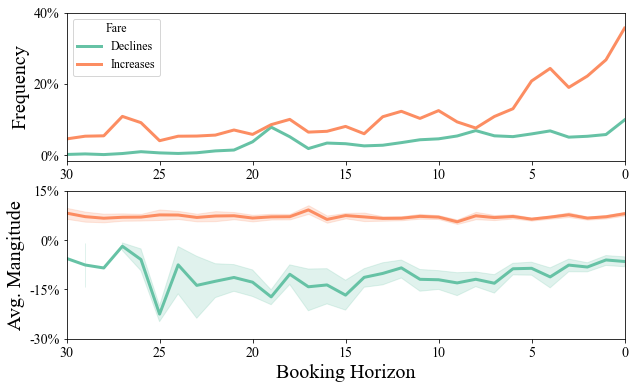

In [124]:
plt.figure(figsize=(10, 6))


figdata = (
    pd.DataFrame(data.groupby("days_till_dep")["price_change_direction"].value_counts())
    .rename(columns={"price_change_direction": "sum"})
    .reset_index()
)

figdata = figdata.merge(
    figdata.groupby("days_till_dep")["sum"]
    .sum()
    .reset_index()
    .rename(columns={"sum": "all"}),
    on="days_till_dep",
)

figdata["price_change_freq"] = figdata["sum"] / figdata["all"]

figdata = figdata.loc[figdata["price_change_direction"] != 0]

# TOP FIG.
ax1 = plt.subplot(2, 1, 1)

sns.lineplot(
    data=figdata,
    x="days_till_dep",
    y="price_change_freq",
    hue="price_change_direction",
    palette="Set2",
    linewidth=3,
    ax=ax1,
)

plt.gca().invert_xaxis()

plt.xlabel("", fontsize=0, fontweight=450)
plt.ylabel("Frequency", fontsize=20, fontweight=450)
#plt.title(
#    "Figure 2: Frequency and Mangitude of Fare Changes\nby Day Before Departure",
#    fontsize=24,
#    y=1.1,
#)


ax1.legend(("Declines", "Increases"), loc="upper left", prop={"size": 12}).set_title(
    "Fare", prop={"size": 12}
)

tick_max = 0.3
tick_interval = 0.2
ax1.set_yticks(np.arange(0, tick_max + tick_interval, tick_interval))
ax1.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax1.get_yticks()])
ax1.tick_params(axis="both", which="major", labelsize=14)
ax1.set_xlim(30, 0)


# BOTTOM FIG.
figdata_2 = data.loc[data["price_change_direction"] != 0]

ax2 = plt.subplot(2, 1, 2)
sns.lineplot(
    data=figdata_2,
    x="days_till_dep",
    y="price_change_percentage",
    estimator="mean",
    hue="price_change_direction",
    palette="Set2",
    linewidth=3,
    ax=ax2,
).get_legend().remove()

plt.gca().invert_xaxis()

plt.xlabel("Booking Horizon", fontsize=20, fontweight=450)
plt.ylabel("Avg. Mangitude", fontsize=20, fontweight=450)


tick_max = 0.1
tick_min = -0.3
tick_interval = 0.15

ax2.set_yticks(np.arange(tick_min, tick_max + tick_interval, tick_interval))
ax2.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax2.get_yticks()])

ax2.set_xlim(30, 0)
ax2.tick_params(axis="both", which="major", labelsize=14)

plt.savefig("figures/fig2_freq_and_magn_of_fare_changes", dpi=300)
plt.show()

# bele

___

In [45]:
# price inc prob last day
(data.query("days_till_dep == 0")["price_increase"].value_counts()[1] / data.query(
    "days_till_dep == 0"
)["price_increase"].value_counts().sum()).round(4)

0.3565

In [44]:
# price inc prob before last week
(
    data.query("days_till_dep > 7")["price_increase"].value_counts()[1]
    / data.query("days_till_dep >7 ")["price_increase"].value_counts().sum()
).round(4)

0.0796

In [47]:
# price inc prob in last week
(
    data.query("days_till_dep < 7")["price_increase"].value_counts()[1]
    / data.query("days_till_dep < 7 ")["price_increase"].value_counts().sum()
).round(4)

0.2231

In [48]:
# price inc prob last week low load fact
(
    data.query("days_till_dep < 7 and loading_factor_cat == 'low'")[
        "price_increase"
    ].value_counts()[1]
    / data.query("days_till_dep < 7 and loading_factor_cat == 'low'")["price_increase"]
    .value_counts()
    .sum()
).round(4)

0.1973

In [134]:
data.query("days_till_dep > 7 and loading_factor_cat == 'high' ")["price_change_percentage"].mean()

0.0041380374011952955

In [132]:
data.query("days_till_dep < 5 and loading_factor_cat == 'low' ")["price_change_percentage"].mean()

0.008696549137284322

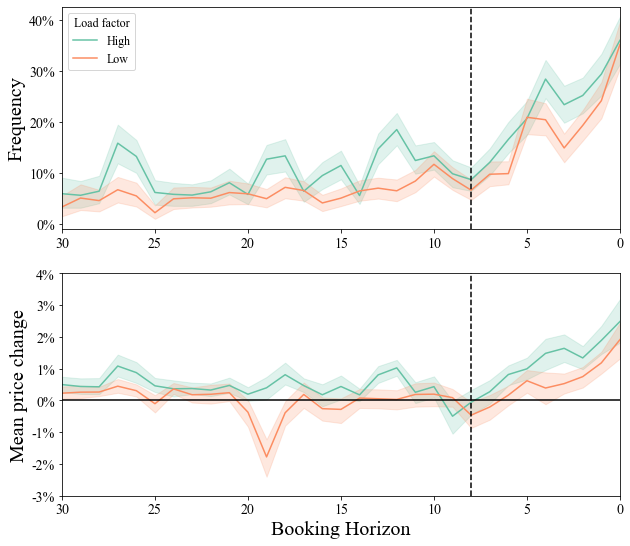

In [149]:
plt.figure(figsize=(10, 9))

# TOP FIG.
ax1 = plt.subplot(2, 1, 1)

sns.lineplot(
    data=data,
    x="days_till_dep",
    y="price_increase",
    estimator="mean",
    hue="loading_factor_cat",
    palette="Set2",
    ax=ax1
)
plt.gca().invert_xaxis()

tick_max = 0.4
tick_min = 0
tick_interval = 0.1

ax1.set_yticks(np.arange(tick_min, tick_max + tick_interval, tick_interval))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


ax1.legend(("High", "Low"), loc="upper left", prop={"size": 12}).set_title(
    "Load factor", prop={"size": 12}
)
ax1.set_xlim(30, 0)

ax.set_xlim(30, 0)
plt.xlabel("", fontsize=20, fontweight=450)
plt.ylabel("Frequency", fontsize=20, fontweight=450)

plt.axvline(8, 0, 1, color="black", linestyle="--", linewidth=1.5)

ax1.tick_params(axis="both", which="major", labelsize=14)
# plt.title("Proportion of trains that's price increased", fontsize=28, y=1.04)

# BOTTOM FIG.

ax2 = plt.subplot(2, 1, 2)

sns.lineplot(
    data=data,
    x="days_till_dep",
    y="price_change_percentage",
    estimator="mean",
    hue="loading_factor_cat",
    palette="Set2",
    ax=ax2,
).get_legend().remove()

plt.gca().invert_xaxis()

tick_max = 0.04
tick_min = -0.03
tick_interval = 0.01

ax2.set_yticks(np.arange(tick_min, tick_max + tick_interval, tick_interval))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 


ax2.set_xlim(30, 0)
plt.xlabel("Booking Horizon", fontsize=20, fontweight=450)
plt.ylabel("Mean price change", fontsize=20, fontweight=450)

plt.axvline(8, 0, 1, color="black", linestyle="--", linewidth=1.5)

plt.axhline(0, 0, 1, color="black", linestyle="-", linewidth=1.5)

ax2.tick_params(axis="both", which="major", labelsize=14)




plt.savefig("figures/fig3_price_change_freq_percent", dpi=300)
plt.show()

# kell

___